In [40]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import glob
import re
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")

In [2]:
files = glob.glob('/Users/ahsanmunir/Desktop/Danish Semester Project/cars detailed/*.xls')
master_df = pd.DataFrame()
for file in files:
    temp = pd.read_excel(file)
    temp = temp[~temp['Cars'].isna()]
    temp = temp[~temp['Cars Sold'].isna()]
    temp['Cars Sold'] = temp['Cars Sold'].astype(int)

    year = file.split("/")[-1]
    year = year.split(".")[0]
    temp['Year'] = int(re.findall('[^a-zA-Z]+', year)[-1])
    
    master_df =  master_df.append(temp)
    # break
master_df = master_df.reset_index()

car_data = master_df
car_data

,index,Cars,Cars Sold,Year
0,0,ALFA ROMEO,87,2018
1,1,AUDI,4913,2018
2,2,BMW,4280,2018
3,3,CHRYSLER,0,2018
4,4,CITROEN,1115,2018
...,...,...,...,...
291,31,TOYOTA,15523,2016
292,32,VOLKSWAGEN,15408,2016
293,33,VOLVO,1996,2016
294,34,PRIVATE IMPORT,105,2016


In [3]:
print("The dataset has ",car_data.shape[0]," rows.")
print("The dataset has ",car_data.shape[1]," columns.")

The dataset has  296  rows.
The dataset has  4  columns.


In [4]:
car_data.describe

<bound method NDFrame.describe of      index            Cars  Cars Sold  Year
0        0      ALFA ROMEO         87  2018
1        1            AUDI       4913  2018
2        2             BMW       4280  2018
3        3        CHRYSLER          0  2018
4        4         CITROEN       1115  2018
..     ...             ...        ...   ...
291     31          TOYOTA      15523  2016
292     32      VOLKSWAGEN      15408  2016
293     33           VOLVO       1996  2016
294     34  PRIVATE IMPORT        105  2016
295     35           OTHER          0  2016

[296 rows x 4 columns]>

In [5]:
car_data.isnull().sum()

index        0
Cars         0
Cars Sold    0
Year         0
dtype: int64

In [6]:
car_data[car_data.columns].dtypes

index         int64
Cars         object
Cars Sold     int64
Year          int64
dtype: object

In [7]:
from collections import Counter
Counter(car_data['Cars'])

Counter({'ALFA ROMEO': 8,
         'AUDI': 8,
         'BMW': 8,
         'CHRYSLER': 8,
         'CITROEN': 8,
         'DACIA': 6,
         'DS': 4,
         'FIAT': 8,
         'FORD': 8,
         'HONDA': 8,
         'HYUNDAI': 8,
         'JAGUAR': 8,
         'JEEP': 8,
         'KIA': 8,
         'LAND ROVER': 8,
         'LEXUS': 8,
         'MAZDA': 8,
         'MERCEDES-BENZ': 8,
         'MINI': 8,
         'MITSUBISHI': 8,
         'NISSAN': 8,
         'OPEL': 3,
         'PERODUA': 8,
         'PEUGEOT': 8,
         'PORSCHE': 8,
         'PRIVATE IMPORT': 8,
         'RENAULT': 8,
         'SEAT': 8,
         'SKODA': 8,
         'SSANGYONG': 5,
         'SUBARU': 8,
         'SUZUKI': 8,
         'TESLA': 3,
         'TOYOTA': 8,
         'VOLKSWAGEN': 8,
         'VOLVO': 8,
         'OTHER': 7,
         'GM(OPEL)': 5,
         'MG': 3,
         'CHEVROLET': 2,
         'DAIHATSU': 2,
         'DODGE': 2,
         'SAAB': 2,
         'CADILLAC': 1,
         'SMART': 1,

In [8]:
car_data[car_data.duplicated()]

,index,Cars,Cars Sold,Year


In [9]:
pivot_table = pd.pivot_table(car_data, index=['Cars'], columns='Year', values='Cars Sold').reset_index()
# pivot_table.drop(['Year'], axis=1, inplace=True)
pivot_table


Year,Cars,2012,2013,2014,2015,2016,2017,2018,2019
0,ALFA ROMEO,18.0,0.0,36.0,43.0,43.0,97.0,87.0,39.0
1,AUDI,759.0,938.0,4259.0,5211.0,6065.0,5535.0,4913.0,4575.0
2,BMW,843.0,922.0,4011.0,4826.0,5504.0,4643.0,4280.0,4005.0
3,CADILLAC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHEVROLET,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5,CHRYSLER,17.0,0.0,23.0,23.0,0.0,0.0,0.0,0.0
6,CITROEN,342.0,260.0,1409.0,1830.0,1408.0,1291.0,1115.0,926.0
7,DACIA,NaN,NaN,2693.0,3784.0,4386.0,3641.0,3624.0,3018.0
8,DAIHATSU,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,DODGE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pivot_table.columns

Index(['Cars', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='object', name='Year')

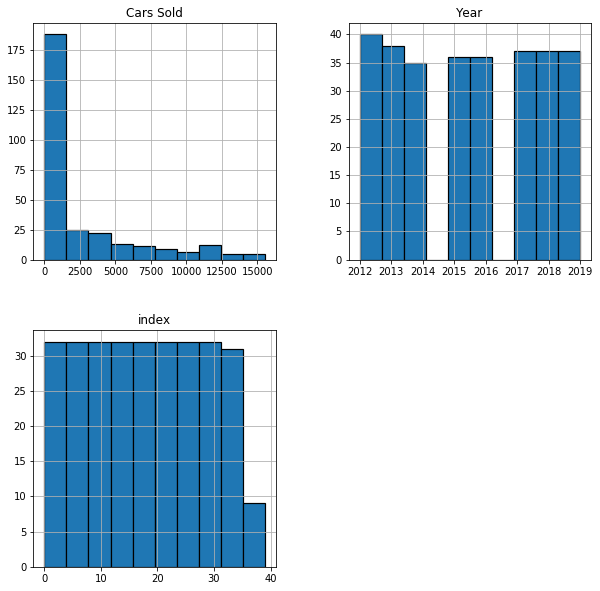

In [11]:
car_data.hist(edgecolor="black", linewidth=1.2, figsize=(10, 10));

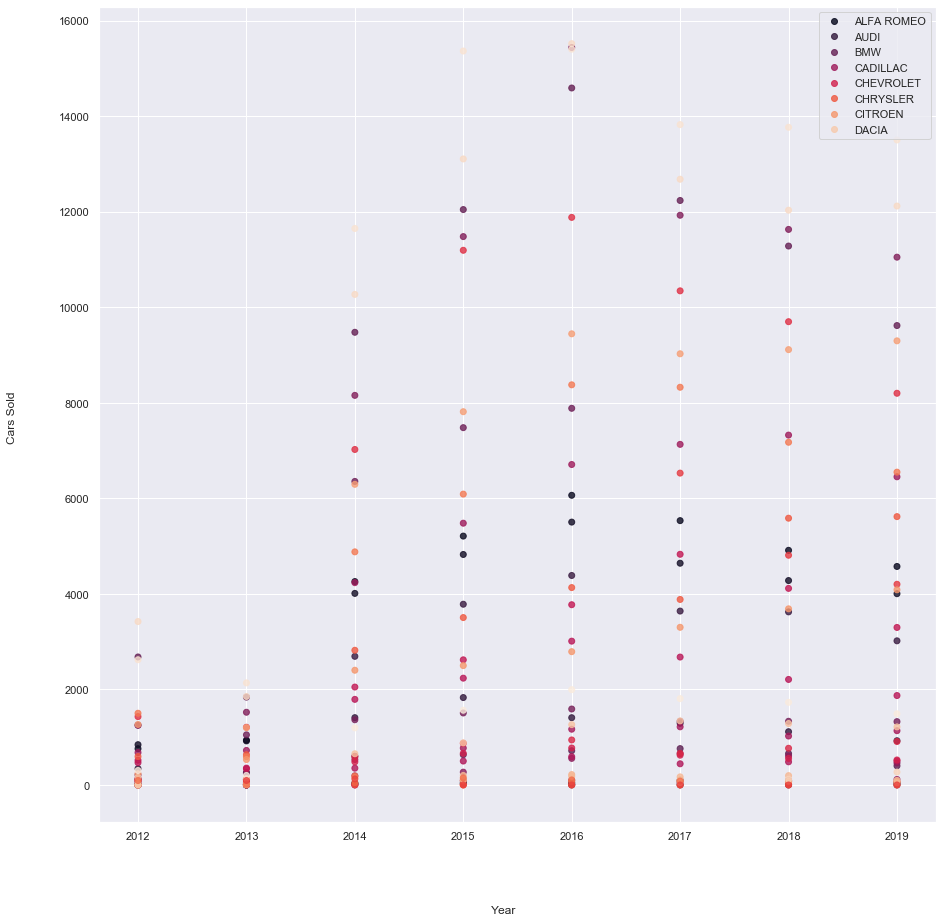

In [33]:
labels, index = np.unique(car_data["Cars"], return_inverse=True)
fig, ax = plt.subplots()
sc = ax.scatter(car_data['Year'], car_data['Cars Sold'], marker = 'o', c = index, alpha = 0.8)
fig.text(0.5, 0.04, 'Year', ha='center')
fig.text(0.04, 0.5, 'Cars Sold', va='center', rotation='vertical')
ax.legend(sc.legend_elements()[0], labels)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [12]:
rows=4
cols=2
fig = make_subplots(rows=rows, cols=cols, subplot_titles=(pivot_table.columns[1:]))
x = 1
for i in range(1, rows + 1):
    for j in range(1, cols + 1):
        fig.add_trace(go.Bar(x =pivot_table['Cars'], y = pivot_table[pivot_table.columns[x]], name=pivot_table.columns[x]) ,
                     row=i,
                     col=j)

        x=x+1

fig.update_layout(height=2000, width=1200)
fig.show()



# fig = px.box(car_data, x="Year", y="VALUE", color="Brand")
# fig

In [13]:
yearly_grouped_car = car_data.groupby(['Year']).sum().reset_index()
yearly_grouped_car.drop(['index'], axis=1, inplace=True)
yearly_grouped_car

,Year,Cars Sold
0,2012,21313
1,2013,17293
2,2014,96338
3,2015,124945
4,2016,146672
5,2017,131356
6,2018,125557
7,2019,117100


In [14]:
fig = px.line(yearly_grouped_car, x='Year', y='Cars Sold')
fig.show()

In [15]:
tourism_df = pd.read_csv("./TMQ05.20220711103214.csv")
tourism_df

,STATISTIC CODE,Statistic,C02149V02592,Type of Expenditure,TLIST(Q1),Quarter,UNIT,VALUE
0,TMQ05,Tourism and Travel Estimated Earnings and Expe...,14,Overseas tourism and travel earnings from trip...,20121,2012Q1,Euro Million,621
1,TMQ05,Tourism and Travel Estimated Earnings and Expe...,14,Overseas tourism and travel earnings from trip...,20122,2012Q2,Euro Million,1048
2,TMQ05,Tourism and Travel Estimated Earnings and Expe...,14,Overseas tourism and travel earnings from trip...,20123,2012Q3,Euro Million,1296
3,TMQ05,Tourism and Travel Estimated Earnings and Expe...,14,Overseas tourism and travel earnings from trip...,20124,2012Q4,Euro Million,806
4,TMQ05,Tourism and Travel Estimated Earnings and Expe...,14,Overseas tourism and travel earnings from trip...,20131,2013Q1,Euro Million,688
...,...,...,...,...,...,...,...,...
91,TMQ05,Tourism and Travel Estimated Earnings and Expe...,16,Tourism and travel balance,20184,2018Q4,Euro Million,177
92,TMQ05,Tourism and Travel Estimated Earnings and Expe...,16,Tourism and travel balance,20191,2019Q1,Euro Million,-231
93,TMQ05,Tourism and Travel Estimated Earnings and Expe...,16,Tourism and travel balance,20192,2019Q2,Euro Million,323
94,TMQ05,Tourism and Travel Estimated Earnings and Expe...,16,Tourism and travel balance,20193,2019Q3,Euro Million,225


In [16]:
print("The dataset has ",tourism_df.shape[0]," rows.")
print("The dataset has ",tourism_df.shape[1]," columns.")

The dataset has  96  rows.
The dataset has  8  columns.


In [17]:
tourism_df[tourism_df.columns].dtypes

STATISTIC CODE         object
Statistic              object
C02149V02592            int64
Type of Expenditure    object
TLIST(Q1)               int64
Quarter                object
UNIT                   object
VALUE                   int64
dtype: object

In [18]:
tourism_df.isnull().sum()

STATISTIC CODE         0
Statistic              0
C02149V02592           0
Type of Expenditure    0
TLIST(Q1)              0
Quarter                0
UNIT                   0
VALUE                  0
dtype: int64

In [19]:
tourism_df[tourism_df.duplicated()]

,STATISTIC CODE,Statistic,C02149V02592,Type of Expenditure,TLIST(Q1),Quarter,UNIT,VALUE


In [20]:
tourism_df.rename({'Quarter':'Year', 'VALUE':'Revenue_Million_Euro'}, axis=1, inplace=True)
tourism_df['Year'] = tourism_df['Year'].str.replace(r'[a-zA-Z]', ' ')
tourism_df['Quarter'] = tourism_df['Year'].str.split(" ").str[1]
tourism_df['Year'] = tourism_df['Year'].str.split(" ").str[0].astype(int)
tourism_df = tourism_df[['Year', 'Quarter', 'Type of Expenditure', 'Revenue_Million_Euro']]
tourism_df

,Year,Quarter,Type of Expenditure,Revenue_Million_Euro
0,2012,1,Overseas tourism and travel earnings from trip...,621
1,2012,2,Overseas tourism and travel earnings from trip...,1048
2,2012,3,Overseas tourism and travel earnings from trip...,1296
3,2012,4,Overseas tourism and travel earnings from trip...,806
4,2013,1,Overseas tourism and travel earnings from trip...,688
...,...,...,...,...
91,2018,4,Tourism and travel balance,177
92,2019,1,Tourism and travel balance,-231
93,2019,2,Tourism and travel balance,323
94,2019,3,Tourism and travel balance,225


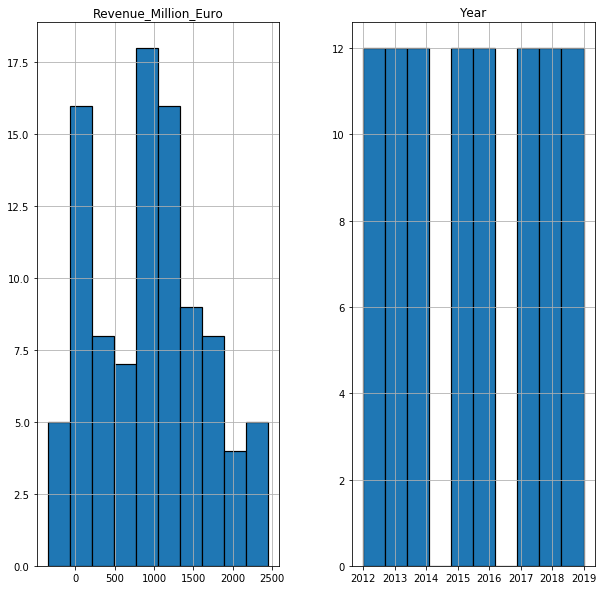

In [21]:
tourism_df.hist(edgecolor="black", linewidth=1.2, figsize=(10, 10));

In [22]:
pivot_table = pd.pivot_table(tourism_df, index=['Type of Expenditure', 'Quarter'], columns='Year', values='Revenue_Million_Euro').reset_index()
pivot_table

Year,Type of Expenditure,Quarter,2012,2013,2014,2015,2016,2017,2018,2019
0,Overseas tourism and travel earnings from trip...,1,621,688,699,780,926,945,1079,1029
1,Overseas tourism and travel earnings from trip...,2,1048,1140,1331,1566,1655,1876,1970,2012
2,Overseas tourism and travel earnings from trip...,3,1296,1546,1734,2037,2241,2287,2425,2448
3,Overseas tourism and travel earnings from trip...,4,806,864,952,1148,1242,1377,1400,1378
4,Overseas tourism and travel expenditure by Iri...,1,821,828,723,794,971,952,1047,1260
5,Overseas tourism and travel expenditure by Iri...,2,1054,1037,1133,1170,1243,1281,1438,1689
6,Overseas tourism and travel expenditure by Iri...,3,1648,1565,1559,1680,1771,1875,1931,2223
7,Overseas tourism and travel expenditure by Iri...,4,889,865,952,1050,1118,1107,1223,1308
8,Tourism and travel balance,1,-200,-140,-24,-14,-45,-7,32,-231
9,Tourism and travel balance,2,-6,103,198,396,412,595,532,323


In [23]:
rows=4
cols=2
fig = make_subplots(rows=rows, cols=cols, subplot_titles=(pivot_table.columns[2:]))
x = 2
for i in range(1, rows + 1):
    for j in range(1, cols + 1):
        fig.add_trace(go.Box(x =pivot_table['Type of Expenditure'], y = pivot_table[pivot_table.columns[x]], name=pivot_table.columns[x]) ,
                     row=i,
                     col=j)

        x=x+1

fig.update_layout(height=2000, width=1200)
fig.show()

In [24]:
rows=4
cols=2
fig = make_subplots(rows=rows, cols=cols, subplot_titles=(pivot_table.columns[2:]))
x = 2
for i in range(1, rows + 1):
    for j in range(1, cols + 1):
        fig.add_trace(go.Box(x =pivot_table['Quarter'], y = pivot_table[pivot_table.columns[x]], name=pivot_table.columns[x]) ,
                     row=i,
                     col=j)

        x=x+1

fig.update_layout(height=2000, width=1200)
fig.show()

In [25]:
fig = px.bar(tourism_df, x="Year", y="Revenue_Million_Euro", color="Quarter")
fig.show()

In [26]:
fig = px.bar(tourism_df, x="Year", y="Revenue_Million_Euro", color="Type of Expenditure")
fig.show()

In [27]:
yearly_grouped_tourism = tourism_df.groupby(['Year']).sum().reset_index()
yearly_grouped_tourism

,Year,Revenue_Million_Euro
0,2012,7543
1,2013,8476
2,2014,9432
3,2015,11062
4,2016,12128
5,2017,12970
6,2018,13748
7,2019,13734


In [28]:
fig = px.line(yearly_grouped_tourism, x='Year', y='Revenue_Million_Euro')
fig.show()

In [29]:
master = pd.merge(yearly_grouped_car, yearly_grouped_tourism, on="Year", how="inner")
master

,Year,Cars Sold,Revenue_Million_Euro
0,2012,21313,7543
1,2013,17293,8476
2,2014,96338,9432
3,2015,124945,11062
4,2016,146672,12128
5,2017,131356,12970
6,2018,125557,13748
7,2019,117100,13734


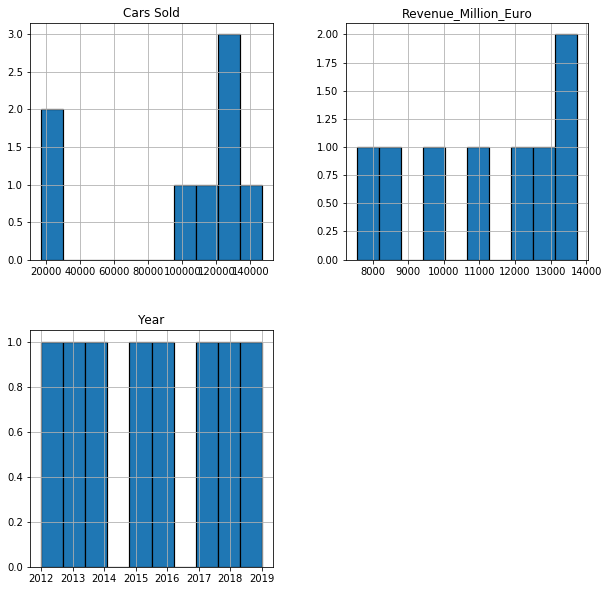

In [30]:
master.hist(edgecolor="black", linewidth=1.2, figsize=(10, 10));

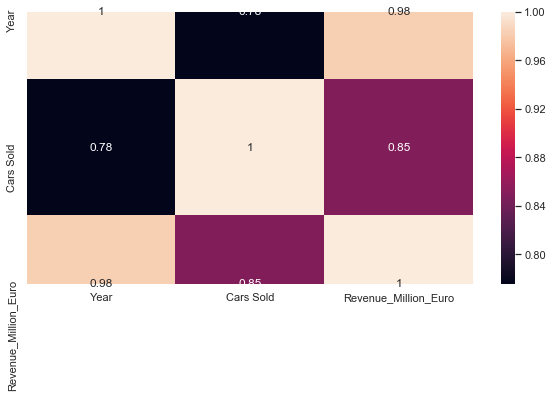

In [31]:
sns.set(font_scale=1)
plt.figure(figsize=(10, 5))
sns.heatmap(master.corr(), annot=True)

In [37]:
scaler = MinMaxScaler()
temp = master
df = master[master.columns[1:-1]]
cols_names = list(master.columns)
df = pd.DataFrame(scaler.fit_transform(master))
print(cols_names)
df.columns = cols_names
df['Year'] = temp['Year']
df

['Year', 'Cars Sold', 'Revenue_Million_Euro']


,Year,Cars Sold,Revenue_Million_Euro
0,2012,0.031072,0.000000
1,2013,0.000000,0.150363
2,2014,0.610957,0.304432
3,2015,0.832067,0.567123
4,2016,1.000000,0.738920
5,2017,0.881619,0.874617
6,2018,0.836797,1.000000
7,2019,0.771431,0.997744


In [39]:
pd.options.plotting.backend = "plotly"
df.plot(x='Year', y=['Cars Sold', 'Revenue_Million_Euro'])

In [65]:
X = master[master.columns[:-1]]
y = master['Revenue_Million_Euro']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

In [64]:
master

,Year,Cars Sold,Revenue_Million_Euro
0,2012,21313,7543
1,2013,17293,8476
2,2014,96338,9432
3,2015,124945,11062
4,2016,146672,12128
5,2017,131356,12970
6,2018,125557,13748
7,2019,117100,13734


In [66]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9846435279305843

In [67]:
reg.coef_

array([8.02434792e+02, 1.04380495e-02])

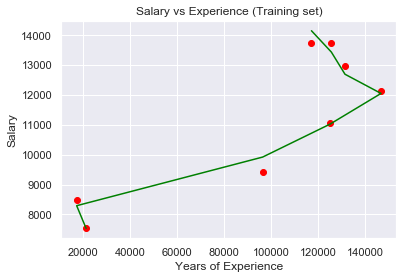

In [68]:
plt.scatter(X['Cars Sold'], y, color = "red")
plt.plot(X['Cars Sold'], reg.predict(X), color = "green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()